<a href="https://colab.research.google.com/github/YoheiMurata/ComicketSSD/blob/main/vgg16_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
# FiftyOneでデータを学習データをダウンロードするか。
# True： ダウンロードをする
# False：ダウンロードせずにGoogleDrive上のデータセットを使う（以前ダウンロードしたことがある前提）
isDownload = True
# GoogleDriveにダウンロードした学習データを保存するか。
# True：保存する
# False：保存しない
saveDrive = True
if isDownload:
  !pip install fiftyone
  !pip install fiftyone-db==0.4.3

  import fiftyone as fo
  import fiftyone.zoo as foz

In [42]:
# 学習を行う対象の画像ラベル
model_classes = ['airplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus', 'car', 'cat', 'chair', 'cow', 'dining table', 'dog', 'horse', 'motorcycle', 'person', 'potted plant', 'sheep', 'bed', 'train', 'tv']

In [43]:
if isDownload:
  train_dataset = foz.load_zoo_dataset(
    #"open-images-v6",
    "coco-2017",
    split="train",
    label_types=["detections"],
    shuffle = True,
    classes=model_classes,
    max_samples=6000,
    only_matching=True,
    )
  test_dataset = foz.load_zoo_dataset(
    #"open-images-v6",
    "coco-2017",
    label_types=["detections"],
    shuffle = True,
    classes=model_classes,
    max_samples=6000,
    only_matching=True,
    )

INFO:fiftyone.zoo.datasets:Downloading split 'train' to '/root/fiftyone/coco-2017/train' if necessary


Found annotations at '/root/fiftyone/coco-2017/raw/instances_train2017.json'


INFO:fiftyone.utils.coco:Found annotations at '/root/fiftyone/coco-2017/raw/instances_train2017.json'


Sufficient images already downloaded


INFO:fiftyone.utils.coco:Sufficient images already downloaded


Existing download of split 'train' is sufficient


INFO:fiftyone.zoo.datasets:Existing download of split 'train' is sufficient


Loading existing dataset 'coco-2017-train-6000'. To reload from disk, either delete the existing dataset or provide a custom `dataset_name` to use


INFO:fiftyone.zoo.datasets:Loading existing dataset 'coco-2017-train-6000'. To reload from disk, either delete the existing dataset or provide a custom `dataset_name` to use


INFO:fiftyone.zoo.datasets:Downloading split 'train' to '/root/fiftyone/coco-2017/train' if necessary


Found annotations at '/root/fiftyone/coco-2017/raw/instances_train2017.json'


INFO:fiftyone.utils.coco:Found annotations at '/root/fiftyone/coco-2017/raw/instances_train2017.json'


Sufficient images already downloaded


INFO:fiftyone.utils.coco:Sufficient images already downloaded


Existing download of split 'train' is sufficient


INFO:fiftyone.zoo.datasets:Existing download of split 'train' is sufficient


INFO:fiftyone.zoo.datasets:Downloading split 'validation' to '/root/fiftyone/coco-2017/validation' if necessary


Found annotations at '/root/fiftyone/coco-2017/raw/instances_val2017.json'


INFO:fiftyone.utils.coco:Found annotations at '/root/fiftyone/coco-2017/raw/instances_val2017.json'


Only found 4051 (<6000) samples matching your requirements


Sufficient images already downloaded


INFO:fiftyone.utils.coco:Sufficient images already downloaded


Existing download of split 'validation' is sufficient


INFO:fiftyone.zoo.datasets:Existing download of split 'validation' is sufficient


INFO:fiftyone.zoo.datasets:Downloading split 'test' to '/root/fiftyone/coco-2017/test' if necessary


Test split is unlabeled; ignoring classes requirement


Found test info at '/root/fiftyone/coco-2017/raw/image_info_test2017.json'


INFO:fiftyone.utils.coco:Found test info at '/root/fiftyone/coco-2017/raw/image_info_test2017.json'


Sufficient images already downloaded


INFO:fiftyone.utils.coco:Sufficient images already downloaded


Existing download of split 'test' is sufficient


INFO:fiftyone.zoo.datasets:Existing download of split 'test' is sufficient


Loading existing dataset 'coco-2017-6000'. To reload from disk, either delete the existing dataset or provide a custom `dataset_name` to use


INFO:fiftyone.zoo.datasets:Loading existing dataset 'coco-2017-6000'. To reload from disk, either delete the existing dataset or provide a custom `dataset_name` to use


In [44]:
if isDownload:
  fo.launch_app(train_dataset)

In [45]:
from google.colab import drive

root_path = 'drive'
# GoogleDrive上のパス。保存先変更する場合はここを修正
dataset_path = '/MyDrive/ssd/dataset/classification/'
drive.mount(root_path)

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [46]:
if isDownload and saveDrive:
  test_dataset.export(export_dir = root_path + dataset_path + 'Test',
               dataset_type = fo.types.ImageClassificationDirectoryTree,
               )
  train_dataset.export(export_dir = root_path + dataset_path + 'Train',
               dataset_type = fo.types.ImageClassificationDirectoryTree,
               )


Directory 'drive/MyDrive/ssd/dataset/classification/Test' already exists; export will be merged with existing files


Detected an image classification exporter and a label field 'ground_truth' of type <class 'fiftyone.core.labels.Detections'>. Exporting image patches...


INFO:fiftyone.utils.data.exporters:Detected an image classification exporter and a label field 'ground_truth' of type <class 'fiftyone.core.labels.Detections'>. Exporting image patches...


 100% |█████████████| 51134/51134 [3.1h elapsed, 0s remaining, 55.8 samples/s]      


INFO:eta.core.utils: 100% |█████████████| 51134/51134 [3.1h elapsed, 0s remaining, 55.8 samples/s]      


Detected an image classification exporter and a label field 'ground_truth' of type <class 'fiftyone.core.labels.Detections'>. Exporting image patches...


INFO:fiftyone.utils.data.exporters:Detected an image classification exporter and a label field 'ground_truth' of type <class 'fiftyone.core.labels.Detections'>. Exporting image patches...


 100% |█████████████| 30282/30282 [5.2m elapsed, 0s remaining, 118.6 samples/s]      


INFO:eta.core.utils: 100% |█████████████| 30282/30282 [5.2m elapsed, 0s remaining, 118.6 samples/s]      


In [47]:
!rm -rf ./Test
!rm -rf ./Train

# FiftyOneを利用してダウンロードした場合は、仮想マシンのローカルにも
# データセットを出力する。そうでない場合はGoogle Drive上のパスからローカルにコピーしてくる
if isDownload:
  test_dataset.export(export_dir = './Test',
                 dataset_type = fo.types.ImageClassificationDirectoryTree,
                 )
  train_dataset.export(export_dir = './Train',
               dataset_type = fo.types.ImageClassificationDirectoryTree,
               )
else:
  !cp -R $root_path$dataset_path'Test' ./
  !cp -R $root_path$dataset_path'Train' ./


Detected an image classification exporter and a label field 'ground_truth' of type <class 'fiftyone.core.labels.Detections'>. Exporting image patches...


INFO:fiftyone.utils.data.exporters:Detected an image classification exporter and a label field 'ground_truth' of type <class 'fiftyone.core.labels.Detections'>. Exporting image patches...


 100% |█████████████| 51134/51134 [2.6m elapsed, 0s remaining, 184.4 samples/s]      


INFO:eta.core.utils: 100% |█████████████| 51134/51134 [2.6m elapsed, 0s remaining, 184.4 samples/s]      


Detected an image classification exporter and a label field 'ground_truth' of type <class 'fiftyone.core.labels.Detections'>. Exporting image patches...


INFO:fiftyone.utils.data.exporters:Detected an image classification exporter and a label field 'ground_truth' of type <class 'fiftyone.core.labels.Detections'>. Exporting image patches...


 100% |█████████████| 30282/30282 [1.6m elapsed, 0s remaining, 344.4 samples/s]      


INFO:eta.core.utils: 100% |█████████████| 30282/30282 [1.6m elapsed, 0s remaining, 344.4 samples/s]      


In [48]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms

In [49]:
import xml.etree.ElementTree as ET
from PIL import Image
import matplotlib.pyplot as plt
import random
import cv2
from google.colab import drive
import glob
import os
import numpy as np
import torch.optim as optim

In [50]:
insize = 224

In [51]:
# SSDの先頭部分は一般的なVGG-16となる。本コードではVGG-16の実装を返す関数を定義する
def make_vgg():
  cfg = [ 64, 64, 'M', 128, 128, 'M', 256, 256, 256, 'C', 512, 512, 512, 'M', 512, 512, 512 ]

  layers = []
  in_channels = 3
  for v in cfg:
    if v == 'M':
      layers += [ nn.MaxPool2d( kernel_size = 2, stride = 2 ) ]
    elif v == 'C':
      ## Ceil_modeは端数を切り上げる（少数第一桁以下を切り上げる）ことをさす。デフォルトは切り捨て
      layers += [ nn.MaxPool2d( kernel_size = 2, stride = 2, ceil_mode = True ) ]
    else:
        conv2d = nn.Conv2d( in_channels, v, kernel_size = 3, padding = 1 )
        layers += [ conv2d, nn.ReLU( inplace = True ) ]
        in_channels = v
  pool5 = nn.MaxPool2d( kernel_size = 3, stride = 1, padding = 1 )
  conv6 = nn.Conv2d( 512, 1024, kernel_size = 3, padding = 6, dilation = 6 )
  conv7 = nn.Conv2d( 1024, 1024, kernel_size = 1 )
  layers += [ pool5, conv6, nn.ReLU( inplace = True ), conv7, nn.ReLU( inplace = True ) ]

  return nn.ModuleList( layers )

In [52]:
vgg16 = torchvision.models.vgg16(pretrained=True)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [53]:
class Vgg16Classifier(nn.Module):
  def __init__(self, num_classes, fc_size):
    super(Vgg16Classifier, self).__init__()
    self.vgg = make_vgg()
    self.avg = nn.AdaptiveAvgPool2d(7)
    self.classifier = nn.Sequential(
        nn.Linear( fc_size, 4096 ),
        nn.ReLU( inplace = True ),
        nn.Dropout( p = 0.5 ),
        nn.Linear( 4096, 4096 ),
        nn.ReLU( inplace = True ),
        nn.Dropout( p = 0.5 ),
        nn.Linear( 4096, num_classes )
    )

  def forward(self, x):
    for i in range(31):
      x = self.vgg[i](x)
    x = self.avg(x)
    h = x.view(x.size(0), -1)
    h = self.classifier(h)

    return h

In [54]:
# データセットの加工を定義する
data_transforms = {
    'train': transforms.Compose([
                                 transforms.Resize( ( insize, insize ) ),
                                 transforms.RandomHorizontalFlip(),
                                 transforms.RandomRotation( ( -15., 15. ) ),
                                 transforms.ToTensor(),
                                 transforms.Normalize( [ 0.5, 0.5, 0.5 ], [ 0.5, 0.5, 0.5 ] )
    ]),
    'val': transforms.Compose( [
                                transforms.Resize( ( insize, insize ) ),
                                transforms.RandomHorizontalFlip(),
                                transforms.RandomRotation( ( -15., 15. ) ),
                                transforms.ToTensor(),
                                transforms.Normalize( [ 0.5, 0.5, 0.5 ], [ 0.5, 0.5, 0.5 ] )
    ])
}

In [55]:
class Vgg16Dataset(torch.utils.data.Dataset):

  def __init__(self, root, transform = None, train = True):
    # ファイルパスとファイル名のリストを初期化する

    self.transform = transform

    self.images = []
    self.labels = []

    self.root = root

    category_path = ''
    for i, category in enumerate(model_classes):
      if train == True:
        category_path = os.path.join(root, 'Train', category)
      else:
        category_path = os.path.join(root, 'Test', category)

      category_images = os.listdir(category_path)

      category_labels = [i] * len(category_images)
      n = 0
      for image, label in zip(category_images, category_labels):
        self.images.append(os.path.join(category_path, image))
        self.labels.append(label)
        #データ数が1000以上ある場合は切る
        if n > 1000:
          break
        n += 1

  # __getitem__メソッドは特殊メソッドで、これが実装されていると[ index ]で
  # 呼び出すことができる
  def __getitem__(self, index):
    image = self.images[index]
    label = self.labels[index]

    with open(image, 'rb') as f:
      image = Image.open(f)
      image = image.convert('RGB')

    if self.transform is not None:
      image = self.transform(image)

    return image, label

  def __len__(self):
    return len(self.images)

In [56]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

model = Vgg16Classifier(len(model_classes), 512 * 7 * 7).to(device)
vgg16 = vgg16.to(device)
for i in range(30):
  model.vgg[i].parameters = vgg16.features[i].parameters

model.vgg.load_state_dict(torch.load(root_path + dataset_path + "model_vgg_fo_dict_init.pth"))

<All keys matched successfully>

In [57]:
train_datasets = Vgg16Dataset("./", transform = data_transforms['train'], train = True)
train_loader = torch.utils.data.DataLoader(dataset = train_datasets, batch_size = 70, shuffle = True)
test_datasets = Vgg16Dataset("./", transform = data_transforms['val'], train = False)
test_loader = torch.utils.data.DataLoader(dataset = test_datasets, batch_size = 70, shuffle = True)

In [58]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.0001, weight_decay = 5e-4)

num_epochs = 100

train_loss_list = []
train_acc_list = []
val_loss_list = []
val_acc_list = []

for epoch in range( num_epochs ):
  train_loss = 0
  train_acc = 0
  val_loss = 0
  val_acc = 0

  # train
  model.train()
  for i, (images, labels) in enumerate(train_loader):
    # view()での変換をしない
    #print(labels)
    images, labels = images.to(device), labels.to(device)

    optimizer.zero_grad()
    outputs = model(images)
    loss = criterion( outputs, labels )
    train_loss += loss.item()
    train_acc += (outputs.max( 1 )[ 1 ] == labels).sum().item()
    loss.backward()
    optimizer.step()

  avg_train_loss = train_loss / len( train_loader.dataset )
  avg_train_acc = train_acc / len( train_loader.dataset )

  # val
  model.eval()
  with torch.no_grad():
    for images, labels in test_loader:
      # view()での変換をしない
      #print(labels)
      images = images.to( device )
      labels = labels.to( device )
      outputs = model( images )
      loss = criterion( outputs, labels )
      val_loss += loss.item()
      val_acc += ( outputs.max( 1 )[ 1 ] == labels ).sum().item()

  avg_val_loss = val_loss / len( test_loader.dataset )
  avg_val_acc = val_acc / len( test_loader.dataset )

  print( "Epoch [ {} / {} ], Loss: {loss:.4f}, val_loss: {val_loss:.4f}, val_acc: {val_acc:.4f}".format( epoch + 1, num_epochs, i + 1, loss=avg_train_loss, val_loss = avg_val_loss, val_acc = avg_val_acc ))
  train_loss_list.append( avg_train_loss )
  train_acc_list.append( avg_train_acc )
  val_loss_list.append( avg_val_loss )
  val_acc_list.append( avg_val_acc )

Epoch [ 1 / 100 ], Loss: 0.0222, val_loss: 0.0178, val_acc: 0.6133
Epoch [ 2 / 100 ], Loss: 0.0168, val_loss: 0.0161, val_acc: 0.6488
Epoch [ 3 / 100 ], Loss: 0.0151, val_loss: 0.0151, val_acc: 0.6694
Epoch [ 4 / 100 ], Loss: 0.0138, val_loss: 0.0146, val_acc: 0.6815
Epoch [ 5 / 100 ], Loss: 0.0128, val_loss: 0.0142, val_acc: 0.6914
Epoch [ 6 / 100 ], Loss: 0.0116, val_loss: 0.0143, val_acc: 0.6991
Epoch [ 7 / 100 ], Loss: 0.0106, val_loss: 0.0133, val_acc: 0.7222
Epoch [ 8 / 100 ], Loss: 0.0097, val_loss: 0.0130, val_acc: 0.7351
Epoch [ 9 / 100 ], Loss: 0.0088, val_loss: 0.0129, val_acc: 0.7372
Epoch [ 10 / 100 ], Loss: 0.0077, val_loss: 0.0128, val_acc: 0.7526
Epoch [ 11 / 100 ], Loss: 0.0068, val_loss: 0.0125, val_acc: 0.7623
Epoch [ 12 / 100 ], Loss: 0.0061, val_loss: 0.0128, val_acc: 0.7686
Epoch [ 13 / 100 ], Loss: 0.0056, val_loss: 0.0124, val_acc: 0.7742
Epoch [ 14 / 100 ], Loss: 0.0050, val_loss: 0.0131, val_acc: 0.7792
Epoch [ 15 / 100 ], Loss: 0.0046, val_loss: 0.0134, val_a

In [59]:
## SSDで利用する頭の部分のみ保存
torch.save( model.vgg.state_dict(), '{}/model_vgg_fo_dict.pth'.format( root_path + dataset_path ) )

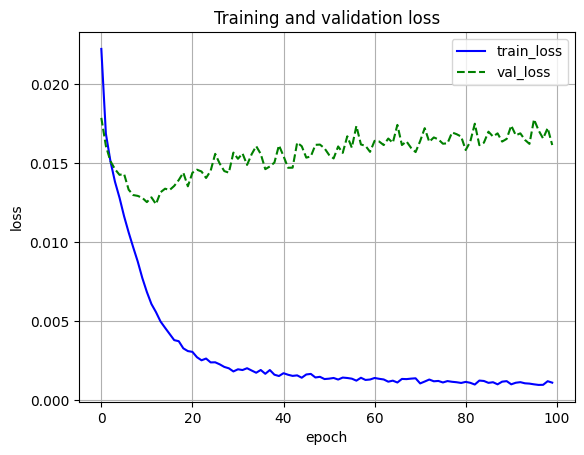

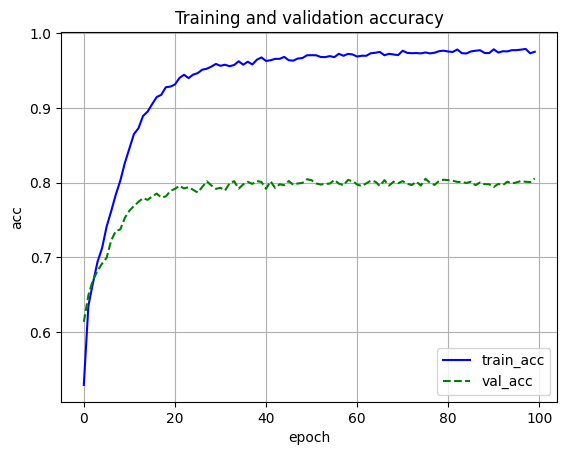

In [60]:
# 計算結果をプロットしていく
plt.figure()
plt.plot( range( num_epochs ), train_loss_list, color = 'blue', linestyle = '-', label = 'train_loss')
plt.plot( range( num_epochs ), val_loss_list, color = 'green', linestyle = '--', label = 'val_loss' )
plt.legend()
plt.xlabel( 'epoch' )
plt.ylabel( 'loss' )
plt.title( 'Training and validation loss' )
plt.grid()

plt.figure()
plt.plot( range( num_epochs ), train_acc_list, color = 'blue', linestyle = '-', label = 'train_acc' )
plt.plot( range( num_epochs ), val_acc_list, color = 'green', linestyle = '--', label = 'val_acc' )
plt.legend()
plt.xlabel( 'epoch' )
plt.ylabel( 'acc' )
plt.title( 'Training and validation accuracy' )
plt.grid()